In [106]:
# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Append base directory
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
path1p = os.path.dirname(currentdir)
path2p = os.path.dirname(path1p)
libpath = os.path.join(path1p, "lib")

sys.path.insert(0, libpath) 
print("Appended library directory", libpath)

# User libraries
from matlab.matlab_lib import loadmat
from matlab.matlab_yaro_lib import matstruct2dict, merge_dicts
from qt_wrapper import gui_fname

Appended library directory /media/aleksejs/DataHDD/work/codes/theoretical-models/experimental-bridge/nest-mesoscopic-metric-test/codes/lib


In [115]:
pwd = '/mnt/hifo_scratch1/Yaro/data_for_TE/'
m_file = gui_fname("Select data directory", pwd, filter="Matlab Files (*.m, *.mat)")
print(m_file)
f = loadmat(m_file)

for k,v in f.items():
    if isinstance(v, float) or isinstance(v, int):
        print(k, v)
    else:
        print(k, v.shape)

/mnt/hifo_scratch1/Yaro/data_for_TE/behavior/mtp_12_lick_reaction/mtp_1/mtp_1_2015_06_18_b/lick_traces.mat
top_thresh 2.65
bot_thresh 2.59
licks_go (1500, 98)
licks_nogo (1500, 3)
x (1500,)
licks_early (0,)
licks_FA (1500, 94)
licks_miss (1500, 3)
go_thresh (1500, 98)
nogo_thresh (1500, 3)
early_thresh (0,)
FA_thresh (1500, 94)
miss_thresh (1500, 3)


# Lick

**lick_traces**
* What are the threshold definitions
  * 
* What are the definitions of 2D arrays
  * What are the dimensions (1500 x N) - (sample @ 100Hz(crop to 8s) vs iTrial)
  
**TODO**
- Yaro said some thresholds were off - how to determine good thresholds
- Gaussian broadening + cutoff from the top - get nice continuous lick signal

In [119]:
def lick_filter(data, bot_th, top_th):
    data[np.isnan(data)] = 0
    return np.logical_or(data <= bot_th, data >= top_th).astype(int)

f['licks_go'] = lick_filter(f['licks_go'], f['bot_thresh'], f['top_thresh'])
f['licks_nogo'] = lick_filter(f['licks_nogo'], f['bot_thresh'], f['top_thresh'])
f['licks_miss'] = lick_filter(f['licks_miss'], f['bot_thresh'], f['top_thresh'])
f['licks_FA'] = lick_filter(f['licks_FA'], f['bot_thresh'], f['top_thresh'])
f['licks_early'] = lick_filter(f['licks_early'], f['bot_thresh'], f['top_thresh'])

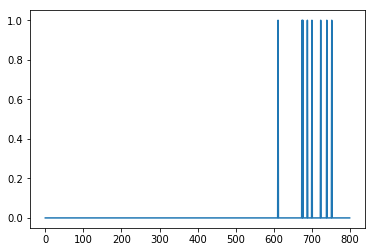

In [118]:
plt.figure()
plt.plot(f['licks_go'][:800, 0])
plt.show()

**mtp_1_2015_06_18_b.mat** - NOT NEEDED
* First dimension (e.g. 198) is N_TRIALS
* What is the *f['licks']['lick_vector']* - Has dimensions (2, N) where N~1000

TRIALS:
* Reward time - add log-exp peak with tau=0.5s
* Puff - punishment for inappropriate trials - may use as extra variable

In [84]:
# Transformation - Run only once!
f['licks'] = [matstruct2dict(obj) for obj in f['licks']]
f['trials'] = [matstruct2dict(obj) for obj in f['trials']]
f['licks'] = merge_dicts(f['licks'])
f['trials'] = merge_dicts(f['trials'])

In [86]:
display(pd.DataFrame(f['trials']))
#display(pd.DataFrame(f['licks']))

# for l in f['licks']['lick_vector']:
#     print(l.shape)

# plt.figure()
# plt.plot(f['licks']['lick_vector'][0][0])
# # plt.plot(f['licks']['lick_vector'][0][1])

,auto_reward,decision,decision_time,end_time,id,no,puff,report,reward_time,stimulus,stimulus_time,time_stamp
0,NaN,Go,6147.6,8449.8,1,1,[],Report,6145.6,Texture 1 P100,3234.3,14:22:15.7161
1,NaN,Inappropriate Response,5921.6,13144.3,2,2,"[5701.599999999999, 5923.6]",Report,NaN,Texture 3 P1200,3047.3,14:22:29.3074
2,NaN,Inappropriate Response,5922.6,13146.4,3,3,"[5824.600000000004, 5924.600000000005]",Report,NaN,Texture 3 P1200,3050.3,14:22:47.5832
3,NaN,Inappropriate Response,5964.6,13187.3,4,4,"[5932.599999999999, 5966.6]",Report,NaN,Texture 3 P1200,3051.3,14:23:05.8571
4,1.0,No Response,7526.7,9784.0,5,5,[],Report,NaN,Texture 1 P100,3076.3,14:23:24.1779
5,NaN,Go,5922.6,8239.8,6,6,[],Report,5920.6,Texture 1 P100,3048.3,14:23:39.0964
6,NaN,Go,5924.6,8226.8,7,7,[],Report,5922.6,Texture 1 P100,3051.3,14:23:52.4707
7,NaN,Inappropriate Response,5933.6,13156.3,8,8,"[5761.500000000001, 5935.6]",Report,NaN,Texture 3 P1200,3060.3,14:24:05.8221
8,NaN,Go,5924.6,8243.8,9,9,[],Report,5922.6,Texture 1 P100,3052.3,14:24:24.1119
9,NaN,Go,5922.6,8240.9,10,10,[],Report,5920.6,Texture 1 P100,3048.3,14:24:37.4912


**RT**

* What are the meanings and the dimensions of the files

**NOTE**: Use only one of the RT files, I forgot which one
**TODO**: Ask Yaro what happens in the Miss trials - is the quantity NAN?

In [78]:
print(f)
f['reaction_time'] = 3.0 + f['reaction_time']

{'reaction_time': array([ 0.94,   nan,   nan,   nan,   nan, -1.38, -1.75,   nan, -1.72,
       -1.72, -2.12,   nan,   nan,   nan,  3.1 ,  2.75, -1.44,   nan,
         nan, -1.43, -1.69,  0.52,   nan,   nan,   nan, -1.05, -2.86,
         nan, -2.85,   nan, -2.8 ,   nan,   nan,   nan, -2.49, -2.76,
         nan,   nan,   nan, -1.43, -1.37,   nan,   nan, -1.31,  1.12,
        2.93,   nan,   nan, -2.36, -1.24, -0.93,   nan, -2.54,   nan,
        2.93,  0.26,  2.56,   nan,  2.12,   nan,   nan,   nan,  2.97,
         nan, -1.2 ,   nan, -1.24, -1.2 ,   nan,   nan,   nan,  3.01,
         nan,   nan, -1.72,   nan,   nan,   nan,  2.78,   nan,  3.18,
         nan,  2.96,   nan,   nan,   nan,  3.94,  2.94,   nan,   nan,
       -1.2 ,   nan,  2.86,   nan,   nan,   nan, -1.29,   nan,   nan,
       -2.41,  3.49,  2.81,   nan,   nan,   nan,  2.35,   nan, -1.67,
         nan,   nan,   nan, -0.23,  2.78,  3.  ,   nan, -1.67,   nan,
       -2.65, -2.43, -1.31,   nan,  1.48,   nan,   nan,  2.84,   nan,
  

# Paw

**Trials.m**: 
(iTrial vs iTime (0-6s, sometimes 7Hz (If step=64), else (>250) 30Hz) )

Rescale file to [0, 1]

(581, 64)


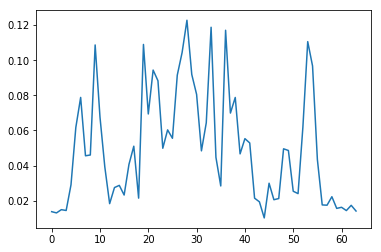

In [89]:
print(f['trials'].shape)

plt.figure()
plt.plot(f['trials'][0])
plt.show()

**deltaI_paw.m** - NOT NEEDED

    t_mean (63614,)
    p_mean (63614,)
    event_ind (1163,)
    stop_ind (581,)

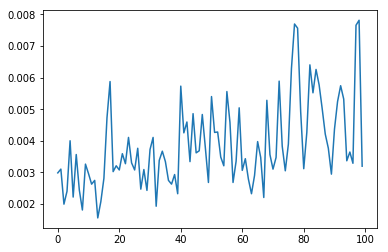

In [48]:
plt.figure()
plt.plot(f['t_mean'][:100])
plt.show()

# Whisk

    whiskAngle (1949, 940)
    
(iTime, iTrial) - iTime @ 200Hz(only early mtp) or 40Hz (mtp, 15,16)

- Crop to 8s

- Compute instant velocity instead of position
- 

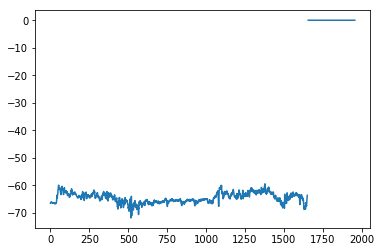

In [96]:
plt.figure()
plt.plot(f['whiskAngle'][:,0])
plt.show()

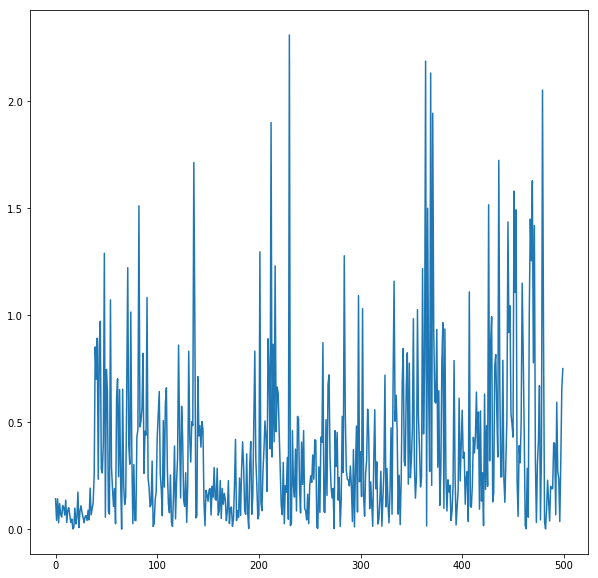

In [103]:
v = [f['whiskAngle'][i, 0] - f['whiskAngle'][i-1, 0] for i in range(1, len(f['whiskAngle'][:, 0]))]
plt.figure(figsize=(10,10))
plt.plot(np.abs(v[:500]))

Open first touch mtp_@#$*&@#$.txt, read column file, 2nd col - first touch in ms